In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv("pokemon.csv")
data

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [81]:
data.corr() #part of predective modelling will discss in details later

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total_power
HP,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620,0.392396
Attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408,0.854698
Defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377,0.841452
Sp. Atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907,0.367463
Sp. Def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937,0.453779
Speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715,0.238027
Generation,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794,0.055441
Legendary,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000,0.350013
total_power,0.392396,0.854698,0.841452,0.367463,0.453779,0.238027,0.055441,0.350013,1.000000


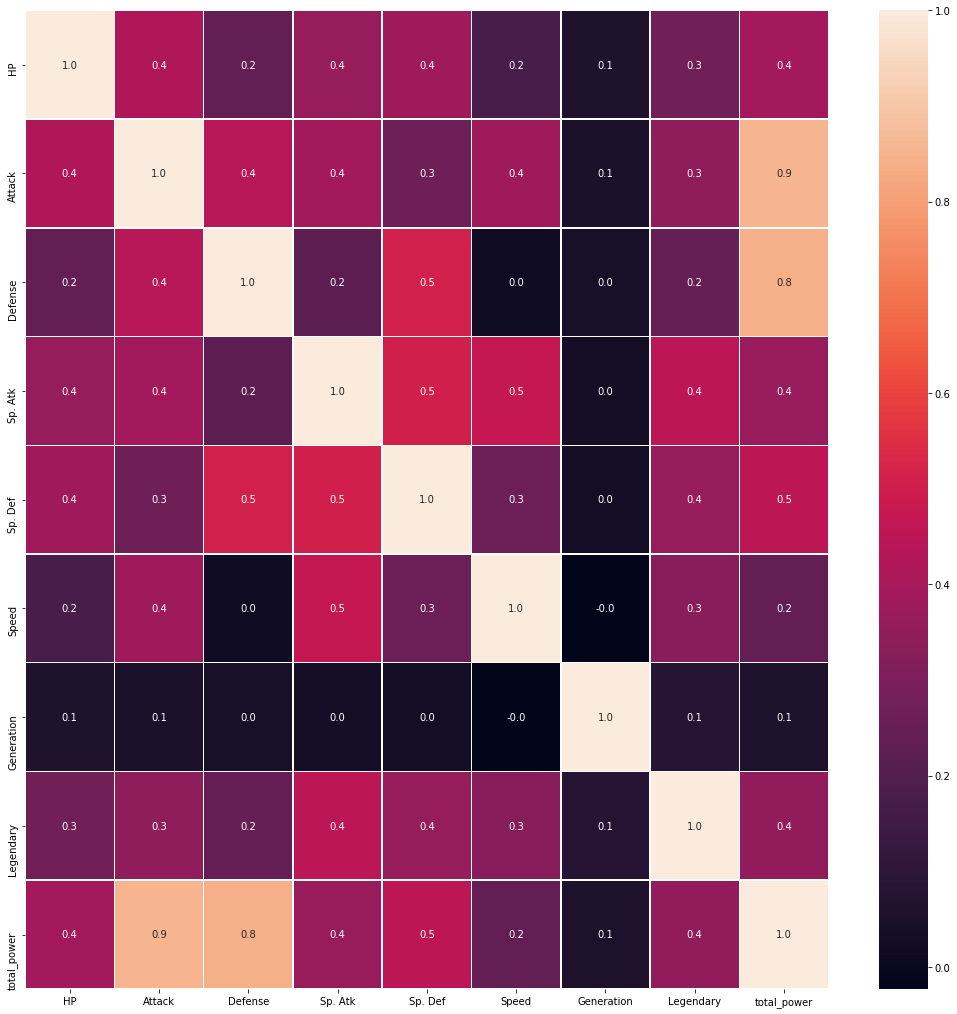

In [80]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax) #remove annot=True, and cee the difference
plt.show()

In [20]:
data.head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,1,False


In [21]:
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [ ]:
#DATA VISUALIZATION: Matplot is a python library that help us to plot data. The easiest and basic plots are line,
#scatter and histogram plots.
#Line plot is better when x axis is time.
#Scatter is better when there is correlation between two variables
#Histogram is better when we need to see distribution of numerical data.
#Customization: Colors,labels,thickness of line, title, opacity, grid, figsize, ticks of axis and linestyle

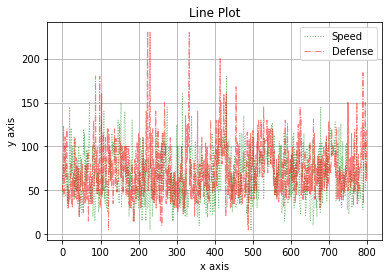

In [22]:
# Line Plot
# color = color, label = label, linewidth = width of line, alpha = opacity, grid = grid, linestyle = sytle of line
data.Speed.plot(kind = 'line', color = 'g',label = 'Speed',linewidth=1,alpha = 0.5,grid = True,linestyle = ':')
data.Defense.plot(color = 'r',label = 'Defense',linewidth=1, alpha = 0.5,grid = True,linestyle = '-.')
plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('x axis')              # label = name of label
plt.ylabel('y axis')
plt.title('Line Plot')            # title = title of plot
plt.show()

Text(0.5,1,'Attack Defense Scatter Plot')

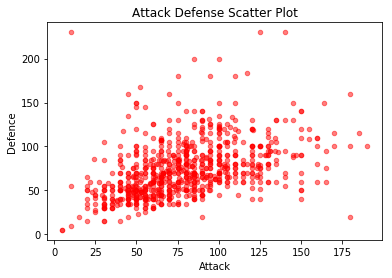

In [23]:
# Scatter Plot 
# x = attack, y = defense
data.plot(kind='scatter', x='Attack', y='Defense',alpha = 0.5,color = 'red')
plt.xlabel('Attack')              # label = name of label
plt.ylabel('Defence')
plt.title('Attack Defense Scatter Plot')            # title = title of plot

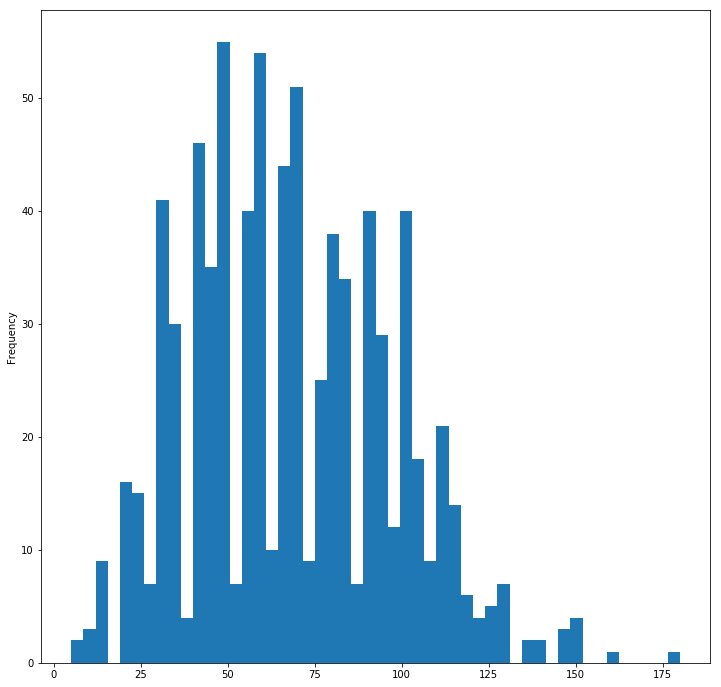

In [24]:
# Histogram
# bins = number of bar in figure
data.Speed.plot(kind = 'hist',bins = 50,figsize = (12,12))
plt.show()

In [25]:
# clf() = cleans it up again you can start a fresh
data.Speed.plot(kind = 'hist',bins = 50)
plt.clf()
# We cannot see plot due to clf()


<Figure size 432x288 with 0 Axes>

In [26]:
# 1 - Filtering Pandas data frame
x = data['Defense']>200     # There are only 3 pokemons who have higher defense value than 200
data[x]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [27]:
# 2 - Filtering pandas with logical_and
# There are only 2 pokemons who have higher defence value than 2oo and higher attack value than 100
data[np.logical_and(data['Defense']>200, data['Attack']>100 )]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [28]:
# This is also same with previous code line. Therefore we can also use '&' for filtering.
data[(data['Defense']>200) & (data['Attack']>100)]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [29]:
# lets return pokemon csv and make one more list comprehension example
# lets classify pokemons whether they have high or low speed. Our threshold is average speed.
threshold = sum(data.Speed)/len(data.Speed)
data["speed_level"] = ["high" if i > threshold else "low" for i in data.Speed]
data.loc[:10,["speed_level","Speed"]] # we will learn loc more detailed later

,speed_level,Speed
0,low,45
1,low,60
2,high,80
3,high,80
4,low,65
5,high,80
6,high,100
7,high,100
8,high,100
9,low,43


In [30]:
# For example lets look frequency of pokemom types
print(data['Type 1'].value_counts(dropna =False))  # if there are nan values that also be counted
# As it can be seen below there are 112 water pokemon or 70 grass pokemon

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ghost        32
Dragon       32
Ground       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64


In [31]:
# For example max HP is 255 or min defense is 5
data.describe() #ignore null entries

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


# VISUAL EXPLORATORY DATA ANALYSIS
Box plots: visualize basic statistics like outliers, min/max or quantiles

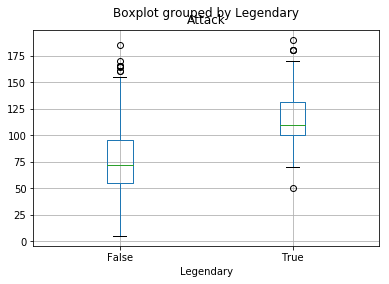

In [32]:
# For example: compare attack of pokemons that are legendary  or not
# Black line at top is max
# Blue line at top is 75%
# Red line is median (50%)
# Blue line at bottom is 25%
# Black line at bottom is min
# There are no outliers
data.boxplot(column='Attack',by = 'Legendary')

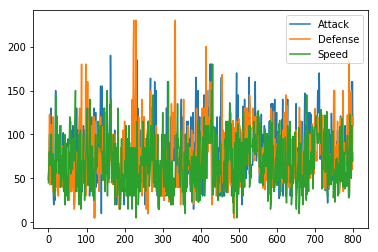

In [41]:
# Plotting all data 
data1 = data.loc[:,["Attack","Defense","Speed"]]
data1.plot()
# it is confusing

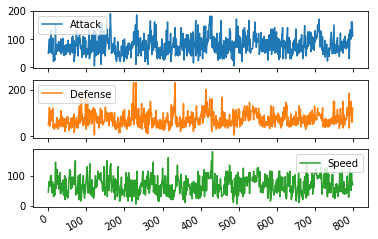

In [42]:
# subplots
data1.plot(subplots = True)
plt.show()

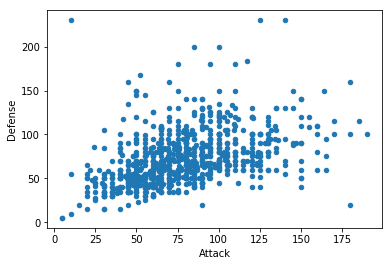

In [43]:
# scatter plot  
data1.plot(kind = "scatter",x="Attack",y = "Defense")
plt.show()

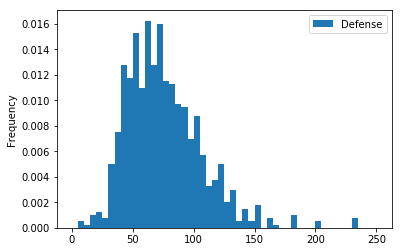

In [45]:
# hist plot  
data1.plot(kind = "hist",y = "Defense",bins = 50,range= (0,250),density = True)

<module 'matplotlib.pyplot' from 'C:\\Users\\ITSpark\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

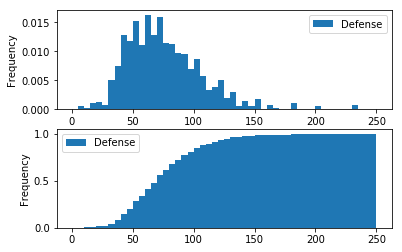

In [47]:
# histogram subplot with non cumulative and cumulative
fig, axes = plt.subplots(nrows=2,ncols=1)
data1.plot(kind = "hist",y = "Defense",bins = 50,range= (0,250),density = True,ax = axes[0])
data1.plot(kind = "hist",y = "Defense",bins = 50,range= (0,250),density = True,ax = axes[1],cumulative = True)
plt.savefig('graph.png')
plt

In [48]:
# In order to practice lets take head of pokemon data and add it a time list
data2 = data.head()
date_list = ["1992-01-10","1992-02-10","1992-03-10","1993-03-15","1993-03-16"]
datetime_object = pd.to_datetime(date_list)
data2["date"] = datetime_object
# lets make date as index
data2= data2.set_index("date")
data2 

C:\Users\ITSpark\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,speed_level
date,,,,,,,,,,,,,
1992-01-10,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45.0,1,False,low
1992-02-10,2,Ivysaur,Grass,Poison,60,62,63,80,80,60.0,1,False,low
1992-03-10,3,Venusaur,Grass,Poison,80,82,83,100,100,80.0,1,False,high
1993-03-15,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80.0,1,False,high
1993-03-16,5,Charmander,Fire,NaN,39,52,43,60,50,65.0,1,False,low


In [50]:
# Now we can select according to our date index
print(data2.loc["1993-03-16"])
print(data2.loc["1992-03-10":"1993-03-16"])

#                       5
Name           Charmander
Type 1               Fire
Type 2                NaN
HP                     39
Attack                 52
Defense                43
Sp. Atk                60
Sp. Def                50
Speed                  65
Generation              1
Legendary           False
speed_level           low
Name: 1993-03-16 00:00:00, dtype: object
            #           Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
date                                                                        
1992-03-10  3       Venusaur  Grass  Poison  80      82       83      100   
1993-03-15  4  Mega Venusaur  Grass  Poison  80     100      123      122   
1993-03-16  5     Charmander   Fire     NaN  39      52       43       60   

            Sp. Def  Speed  Generation  Legendary speed_level  
date                                                           
1992-03-10      100   80.0           1      False        high  
1993-03-15      120   80.0           1     

In [51]:
# We will use data2 that we create at previous part
data2.resample("A").mean()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,
1992-12-31,2.0,61.666667,64.333333,65.0,81.666667,81.666667,61.666667,1.0,False
1993-12-31,4.5,59.500000,76.000000,83.0,91.000000,85.000000,72.500000,1.0,False


In [52]:
# Lets resample with month
data2.resample("M").mean()
# As you can see there are a lot of nan because data2 does not include all months

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,
1992-01-31,1.0,45.0,49.0,49.0,65.0,65.0,45.0,1.0,0.0
1992-02-29,2.0,60.0,62.0,63.0,80.0,80.0,60.0,1.0,0.0
1992-03-31,3.0,80.0,82.0,83.0,100.0,100.0,80.0,1.0,0.0
1992-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
# In real life (data is real. Not created from us like data2) we can solve this problem with interpolate
# We can interpolete from first value
data2.resample("M").first().interpolate("linear")

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,speed_level
date,,,,,,,,,,,,,
1992-01-31,1.000000,Bulbasaur,Grass,Poison,45.0,49.0,49.000000,65.000000,65.000000,45.0,1.0,False,low
1992-02-29,2.000000,Ivysaur,Grass,Poison,60.0,62.0,63.000000,80.000000,80.000000,60.0,1.0,False,low
1992-03-31,3.000000,Venusaur,Grass,Poison,80.0,82.0,83.000000,100.000000,100.000000,80.0,1.0,False,high
1992-04-30,3.083333,NaN,NaN,NaN,80.0,83.5,86.333333,101.833333,101.666667,80.0,1.0,NaN,NaN
1992-05-31,3.166667,NaN,NaN,NaN,80.0,85.0,89.666667,103.666667,103.333333,80.0,1.0,NaN,NaN
1992-06-30,3.250000,NaN,NaN,NaN,80.0,86.5,93.000000,105.500000,105.000000,80.0,1.0,NaN,NaN
1992-07-31,3.333333,NaN,NaN,NaN,80.0,88.0,96.333333,107.333333,106.666667,80.0,1.0,NaN,NaN
1992-08-31,3.416667,NaN,NaN,NaN,80.0,89.5,99.666667,109.166667,108.333333,80.0,1.0,NaN,NaN
1992-09-30,3.500000,NaN,NaN,NaN,80.0,91.0,103.000000,111.000000,110.000000,80.0,1.0,NaN,NaN


In [54]:
# Or we can interpolate with mean()
data2.resample("M").mean().interpolate("linear")

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,
1992-01-31,1.000,45.000000,49.0,49.0,65.00,65.00,45.000,1.0,0.0
1992-02-29,2.000,60.000000,62.0,63.0,80.00,80.00,60.000,1.0,0.0
1992-03-31,3.000,80.000000,82.0,83.0,100.00,100.00,80.000,1.0,0.0
1992-04-30,3.125,78.291667,81.5,83.0,99.25,98.75,79.375,1.0,0.0
1992-05-31,3.250,76.583333,81.0,83.0,98.50,97.50,78.750,1.0,0.0
1992-06-30,3.375,74.875000,80.5,83.0,97.75,96.25,78.125,1.0,0.0
1992-07-31,3.500,73.166667,80.0,83.0,97.00,95.00,77.500,1.0,0.0
1992-08-31,3.625,71.458333,79.5,83.0,96.25,93.75,76.875,1.0,0.0
1992-09-30,3.750,69.750000,79.0,83.0,95.50,92.50,76.250,1.0,0.0


# CONCATENATING DATA
We can concatenate two dataframe 

In [33]:
# Firstly lets create 2 data frame
data1 = data.head()
data2= data.tail()
conc_data_row = pd.concat([data1,data2],axis =0,ignore_index =True) # axis = 0 : adds dataframes in row
conc_data_row

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,speed_level
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,low
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,low
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,high
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,high
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,low
5,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,low
6,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,high
7,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,high
8,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,high
9,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True,high


In [34]:
data1 = data['Attack'].head()
data2= data['Defense'].head()
conc_data_col = pd.concat([data1,data2],axis =1) # axis = 0 : adds dataframes in row
conc_data_col

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43


In [35]:
# lets convert object(str) to categorical and int to float.
data['Type 1'] = data['Type 1'].astype('category')
data['Speed'] = data['Speed'].astype('float')

In [36]:
# As you can see Type 1 is converted from object to categorical
# And Speed ,s converted from int to float
data.dtypes

#                 int64
Name             object
Type 1         category
Type 2           object
HP                int64
Attack            int64
Defense           int64
Sp. Atk           int64
Sp. Def           int64
Speed           float64
Generation        int64
Legendary          bool
speed_level      object
dtype: object

In [37]:
# Lets look at does pokemon data have nan value
# As you can see there are 800 entries. However Type 2 has 414 non-null object so it has 386 null object.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#              800 non-null int64
Name           799 non-null object
Type 1         800 non-null category
Type 2         414 non-null object
HP             800 non-null int64
Attack         800 non-null int64
Defense        800 non-null int64
Sp. Atk        800 non-null int64
Sp. Def        800 non-null int64
Speed          800 non-null float64
Generation     800 non-null int64
Legendary      800 non-null bool
speed_level    800 non-null object
dtypes: bool(1), category(1), float64(1), int64(7), object(3)
memory usage: 61.4+ KB


In [38]:
# Lets checK Type 2
data["Type 2"].value_counts(dropna =False)
# As you can see, there are 386 NAN value

NaN         386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Water        14
Rock         14
Ghost        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

In [39]:
# Lets drop nan values
data1=data   # also we will use data to fill missing value so I assign it to data1 variable
data1["Type 2"].dropna(inplace = True)  # inplace = True means we do not assign it to new variable. Changes automatically assigned to data
# So does it work ?

In [55]:
#INDEXING DATA FRAMES
#Indexing using square brackets
#Using column attribute and row label
#Using loc accessor
#Selecting only some columns

In [60]:
data = pd.read_csv(r"D:\DATA SCIENCE\data set\python/pokemon.csv")
data= data.set_index("#")
data.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [61]:
# indexing using square brackets
data["Speed"][1]

45

In [62]:
# using column attribute and row label
data.HP[1]

45

In [63]:
# using loc accessor
data.loc[1,["HP"]]

HP    45
Name: 1, dtype: object

In [64]:
# using loc accessor
data.loc[1,["HP"]]

HP    45
Name: 1, dtype: object

In [65]:
# Difference between selecting columns: series and dataframes
print(type(data["HP"]))     # series
print(type(data[["HP"]]))   # data frames

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [66]:
# Slicing and indexing series
data.loc[1:10,"HP":"Defense"]   # 10 and "Defense" are inclusive

,HP,Attack,Defense
#,,,
1,45,49,49
2,60,62,63
3,80,82,83
4,80,100,123
5,39,52,43
6,58,64,58
7,78,84,78
8,78,130,111
9,78,104,78


In [67]:
# Reverse slicing 
data.loc[10:1:-1,"HP":"Defense"] 

,HP,Attack,Defense
#,,,
10,44,48,65
9,78,104,78
8,78,130,111
7,78,84,78
6,58,64,58
5,39,52,43
4,80,100,123
3,80,82,83
2,60,62,63


In [68]:
# From something to end
data.loc[1:10,"Speed":] 

,Speed,Generation,Legendary
#,,,
1,45,1,False
2,60,1,False
3,80,1,False
4,80,1,False
5,65,1,False
6,80,1,False
7,100,1,False
8,100,1,False
9,100,1,False


In [69]:
# Creating boolean series
boolean = data.HP > 200
data[boolean]

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
122,Chansey,Normal,NaN,250,5,5,35,105,50,1,False
262,Blissey,Normal,NaN,255,10,10,75,135,55,2,False


In [70]:
# Combining filters
first_filter = data.HP > 150
second_filter = data.Speed > 35
data[first_filter & second_filter]

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
122,Chansey,Normal,NaN,250,5,5,35,105,50,1,False
262,Blissey,Normal,NaN,255,10,10,75,135,55,2,False
352,Wailord,Water,NaN,170,90,45,90,45,60,3,False
656,Alomomola,Water,NaN,165,75,80,40,45,65,5,False


In [71]:
# Filtering column based others
data.HP[data.Speed<15]

#
231     20
360     45
487     50
496    135
659     44
Name: HP, dtype: int64

In [72]:
# Python functions
def div(n):
    return n/2
data.HP.apply(div)

#
1      22.5
2      30.0
3      40.0
4      40.0
5      19.5
6      29.0
7      39.0
8      39.0
9      39.0
10     22.0
11     29.5
12     39.5
13     39.5
14     22.5
15     25.0
16     30.0
17     20.0
18     22.5
19     32.5
20     32.5
21     20.0
22     31.5
23     41.5
24     41.5
25     15.0
26     27.5
27     20.0
28     32.5
29     17.5
30     30.0
       ... 
771    47.5
772    39.0
773    33.5
774    25.0
775    22.5
776    34.0
777    45.0
778    28.5
779    21.5
780    42.5
781    24.5
782    22.0
783    27.0
784    29.5
785    32.5
786    27.5
787    37.5
788    42.5
789    27.5
790    47.5
791    20.0
792    42.5
793    63.0
794    63.0
795    54.0
796    25.0
797    25.0
798    40.0
799    40.0
800    40.0
Name: HP, Length: 800, dtype: float64

In [73]:
# Or we can use lambda function
data.HP.apply(lambda n : n/2)

#
1      22.5
2      30.0
3      40.0
4      40.0
5      19.5
6      29.0
7      39.0
8      39.0
9      39.0
10     22.0
11     29.5
12     39.5
13     39.5
14     22.5
15     25.0
16     30.0
17     20.0
18     22.5
19     32.5
20     32.5
21     20.0
22     31.5
23     41.5
24     41.5
25     15.0
26     27.5
27     20.0
28     32.5
29     17.5
30     30.0
       ... 
771    47.5
772    39.0
773    33.5
774    25.0
775    22.5
776    34.0
777    45.0
778    28.5
779    21.5
780    42.5
781    24.5
782    22.0
783    27.0
784    29.5
785    32.5
786    27.5
787    37.5
788    42.5
789    27.5
790    47.5
791    20.0
792    42.5
793    63.0
794    63.0
795    54.0
796    25.0
797    25.0
798    40.0
799    40.0
800    40.0
Name: HP, Length: 800, dtype: float64

In [74]:
# Defining column using other columns
data["total_power"] = data.Attack + data.Defense
data.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total_power
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,98
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,125
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,165
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,223
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,95


In [75]:
# our index name is this:
print(data.index.name)
# lets change it
data.index.name = "index_name"
data.head()

#


,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total_power
index_name,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,98
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,125
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,165
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,223
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,95


In [76]:
# Overwrite index
# if we want to modify index we need to change all of them.
data.head()
# first copy of our data to data3 then change index 
data3 = data.copy()
# lets make index start from 100. It is not remarkable change but it is just example
data3.index = range(100,900,1)
data3.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total_power
100,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,98
101,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,125
102,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,165
103,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,223
104,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,95


In [77]:
# We can make one of the column as index. I actually did it at the beginning of manipulating data frames with pandas section
# It was like this
# data= data.set_index("#")
# also you can use 
# data.index = data["#"]

In [78]:
# Setting index : type 1 is outer type 2 is inner index
data1 = data.set_index(["Type 1","Type 2"]) 
data1.head(100)
# data1.loc["Fire","Flying"] # howw to use indexes

Name   HP  Attack  Defense  Sp. Atk  Sp. Def  \
Type 1   Type 2                                                              
Grass    Poison          Bulbasaur   45      49       49       65       65   
         Poison            Ivysaur   60      62       63       80       80   
         Poison           Venusaur   80      82       83      100      100   
         Poison      Mega Venusaur   80     100      123      122      120   
Fire     NaN            Charmander   39      52       43       60       50   
         NaN            Charmeleon   58      64       58       80       65   
         Flying          Charizard   78      84       78      109       85   
         Dragon   Mega Charizard X   78     130      111      130       85   
         Flying   Mega Charizard Y   78     104       78      159      115   
Water    NaN              Squirtle   44      48       65       50       64   
         NaN             Wartortle   59      63       80       65       80   
         NaN             Blastoise   79      83      100       85      105   
         NaN        Mega Blastoise   79     103      120      135      115   
Bug      NaN              Caterpie   45      30       35       20       20   
         NaN               Metapod   50      20       55       25       25   
         Flying         Butterfree   60      45       50       90       80   
         Poison             Weedle   40      35       30       20       20   
         Poison             Kakuna   45      25       50       25       25   
         Poison           Beedrill   65      90       40       45       80   
         Poison      Mega Beedrill   65     150       40       15       80   
Normal   Flying             Pidgey   40      45       40       35       35   
         Flying          Pidgeotto   63      60       55       50       50   
         Flying            Pidgeot   83      80       75       70       70   
         Flying       Mega Pidgeot   83      80       80      135       80   
         NaN               Rattata   30      56       35       25       35   
         NaN              Raticate   55      81       60       50       70   
         Flying            Spearow   40      60       30       31       31   
         Flying             Fearow   65      90       65       61       61   
Poison   NaN                 Ekans   35      60       44       40       54   
         NaN                 Arbok   60      85       69       65       79   
...                            ...  ...     ...      ...      ...      ...   
Psychic  NaN              Alakazam   55      50       45      135       95   
         NaN         Mega Alakazam   55      50       65      175       95   
Fighting NaN                Machop   70      80       50       35       35   
         NaN               Machoke   80     100       70       50       60   
         NaN               Machamp   90     130       80       65       85   
Grass    Poison         Bellsprout   50      75       35       70       30   
         Poison         Weepinbell   65      90       50       85       45   
         Poison         Victreebel   80     105       65      100       70   
Water    Poison          Tentacool   40      40       35       50      100   
         Poison         Tentacruel   80      70       65       80      120   
Rock     Ground            Geodude   40      80      100       30       30   
         Ground           Graveler   55      95      115       45       45   
         Ground              Golem   80     120      130       55       65   
Fire     NaN                Ponyta   50      85       55       65       65   
         NaN              Rapidash   65     100       70       80       80   
Water    Psychic          Slowpoke   90      65       65       40       40   
         Psychic           Slowbro   95      75      110      100       80   
         Psychic      Mega Slowbro   95      75      180      130       80   
Electric Steel           Magnemite   25      35     